<a href="https://colab.research.google.com/github/nusc2016/DS-Unit-2-Applied-Modeling/blob/master/Module1/Aaron_Huizenga_LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

## The dataset that I am using is called "Pima Indians Diabetes Database" that is provided by the UCI ML Repository. It was exported as an Excel spreadsheet. I will be performing the ML workflow with this particular Diabetes Data set.

In [0]:
%%capture
import sys

if 'google.colab' in sys.modules:
    # Install packages in Colab
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

In [0]:
!pip install -q matplotlib-venn

In [0]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [237]:
from google.colab import files
files.upload()

Saving diabetic.csv to diabetic (7).csv


{'diabetic.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [238]:
df = pd.read_csv('diabetic.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## In this DS we are able to see that our of the 768 women in the dataset, 500 are labeled as being non-diabetic(0) and 268 are diabetic(1).

In [239]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [240]:
# I want to start by renaming the columns. At the same time I will be able to get
# a good view of the dataset that I am working with.

df.rename(columns={'Pregnancies':'PREGNANCIES'}, inplace=True)
df.rename(columns={'Glucose':'GLUCOSE'}, inplace=True)
df.rename(columns={'BloodPressure':'BP'}, inplace=True)
df.rename(columns={'SkinThickness':'SKIN-THICKNESS'}, inplace=True)
df.rename(columns={'Insulin':'INSULIN'}, inplace=True)
df.rename(columns={'DiabetesPedigreeFunction':'DPF'}, inplace=True)
df.rename(columns={'Age':'AGE'}, inplace=True)
df.rename(columns={'Outcome':'OUTCOME'}, inplace=True)

print(df.shape)
df.head()

(768, 9)


,PREGNANCIES,GLUCOSE,BP,SKIN-THICKNESS,INSULIN,BMI,DPF,AGE,OUTCOME
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [241]:
# I don't like going in the order in which the assignment has, so I am going to 
# do this according to the flow that best works for me. 

df.groupby('OUTCOME').size()

OUTCOME
0    500
1    268
dtype: int64

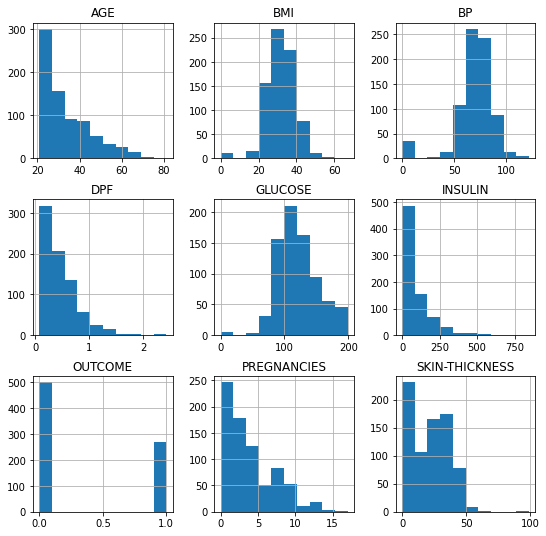

In [242]:
df.hist(figsize=(9, 9));

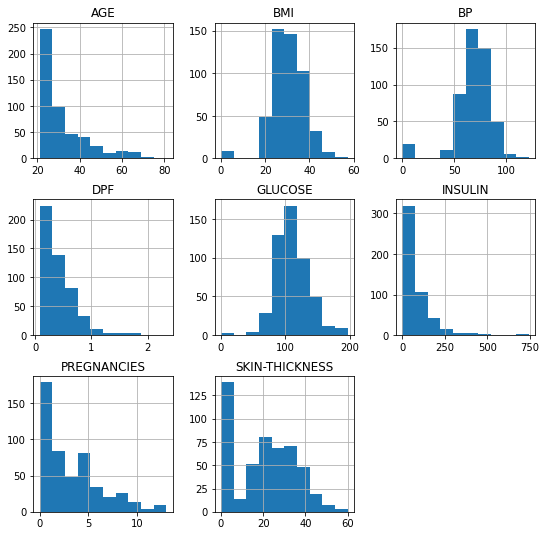

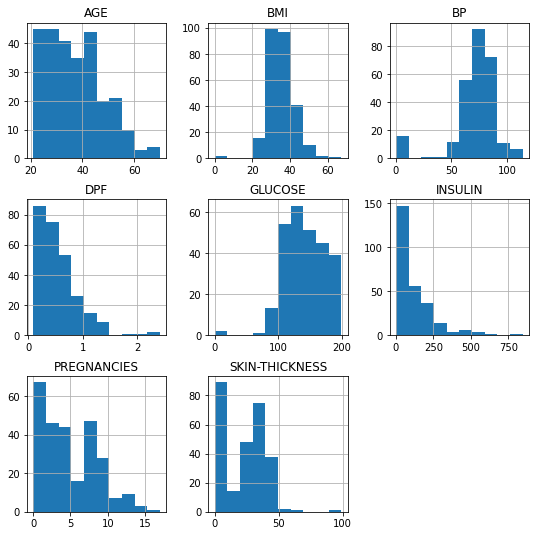

In [243]:
df.groupby('OUTCOME').hist(figsize=(9, 9));

In [244]:
# Next I want to clean the set that I am working with by starting with the isnull
# function to check for missing values. 

df.isnull().sum()

PREGNANCIES       0
GLUCOSE           0
BP                0
SKIN-THICKNESS    0
INSULIN           0
BMI               0
DPF               0
AGE               0
OUTCOME           0
dtype: int64

In [245]:
df.isna().sum()

PREGNANCIES       0
GLUCOSE           0
BP                0
SKIN-THICKNESS    0
INSULIN           0
BMI               0
DPF               0
AGE               0
OUTCOME           0
dtype: int64

# There are some unexpected outliers

In [246]:
print("Total : ", df[df.BP == 0].shape[0])
print(df[df.BP == 0].groupby('OUTCOME')['AGE'].count())

Total :  35
OUTCOME
0    19
1    16
Name: AGE, dtype: int64


In [247]:
print("Total : ", df[df.GLUCOSE == 0].shape[0])
print(df[df.GLUCOSE == 0].groupby('OUTCOME')['AGE'].count())

Total :  5
OUTCOME
0    3
1    2
Name: AGE, dtype: int64


In [248]:
print("Total : ", df[df.BMI == 0].shape[0])
print(df[df.BMI == 0].groupby('OUTCOME')['AGE'].count())

Total :  11
OUTCOME
0    9
1    2
Name: AGE, dtype: int64


In [249]:
print("Total : ", df[df.INSULIN == 0].shape[0])
print(df[df.INSULIN == 0].groupby('OUTCOME')['AGE'].count())

Total :  374
OUTCOME
0    236
1    138
Name: AGE, dtype: int64


In [250]:
df_mod = df[(df.BP != 0) & (df.BMI != 0) & (df.INSULIN != 0)]
print(df_mod.shape)

(393, 9)


## The idea is to get features/response

In [0]:
feature_names = ['PREGNANCIES', 'GLUCOSE', 'BP', 'SKIN-THICKNESS', 'INSULIN', 'BMI', 'DPF', 'AGE']
X = df_mod[feature_names]
y = df_mod['OUTCOME']

## This section will be my model selection between a train/test split and K-Fold cross-validation.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [0]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(gamma='scale')))
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=4000)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=100)))
models.append(('GB', GradientBoostingClassifier()))

In [0]:
# This is where I will use Train/Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df_mod.OUTCOME, random_state=0)

In [259]:
names = []
scores = []

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)

tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.717172
1  SVC  0.737374
2   LR  0.757576
3   DT  0.767677
4  GNB  0.787879
5   RF  0.787879
6   GB  0.808081


In [275]:
# This section will use K-Fold cross validation

strat_k_fold = StratifiedKFold(n_splits=10, random_state=None)

names = []
scores = []

for name, model in models:
    
    score = cross_val_score(model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
    names.append(name)
    scores.append(score)

kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

  Name     Score
0  KNN  0.712372
1  SVC  0.763462
2   LR  0.781218
3   DT  0.712692
4  GNB  0.771026
5   RF  0.776282
6   GB  0.796859


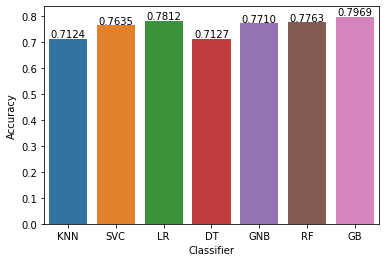

In [276]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [0]:
# I want to take a moment and revisit feature selection

from sklearn.feature_selection import RFECV

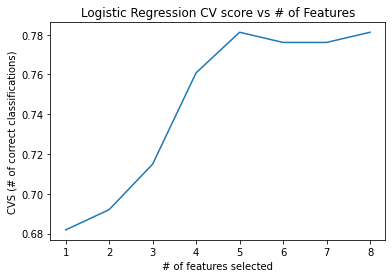

In [280]:
# I want to get into some logistic regression

logreg_model = LogisticRegression(solver='lbfgs', max_iter=4000)

rfecv = RFECV(estimator=logreg_model, step=1, cv=strat_k_fold, scoring='accuracy')
rfecv.fit(X, y)

plt.figure()
plt.title('Logistic Regression CV score vs # of Features')
plt.xlabel("# of features selected")
plt.ylabel("CVS (# of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [281]:

feature_importance = list(zip(feature_names, rfecv.support_))

new_features = []

for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['PREGNANCIES', 'GLUCOSE', 'BMI', 'DPF', 'AGE']


In [282]:
# This cell will calculate accuracy scores

X_new = df_mod[new_features]

initial_score = cross_val_score(logreg_model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))

fe_score = cross_val_score(logreg_model, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.7812179487179487 
Accuracy after Feature Selection : 0.7812179487179487 


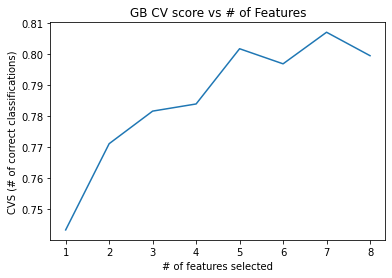

In [283]:
# I want to take a look at the Gradiant boosting model. It's used for regression 
# and classification problems, so to the naked eye of a DS student it's an ensemble

gb_model = GradientBoostingClassifier()

gb_rfecv = RFECV(estimator=gb_model, step=1, cv=strat_k_fold, scoring='accuracy')
gb_rfecv.fit(X, y)

plt.figure()
plt.title('GB CV score vs # of Features')
plt.xlabel("# of features selected")
plt.ylabel("CVS (# of correct classifications)")
plt.plot(range(1, len(gb_rfecv.grid_scores_) + 1), gb_rfecv.grid_scores_)
plt.show()

In [284]:
feature_importance = list(zip(feature_names, gb_rfecv.support_))

new_features = []

for key,value in enumerate(feature_importance):
    if(value[1]) == True:
        new_features.append(value[0])
        
print(new_features)

['PREGNANCIES', 'GLUCOSE', 'SKIN-THICKNESS', 'INSULIN', 'BMI', 'DPF', 'AGE']


In [286]:
X_new_gb = df_mod[new_features]

initial_score = cross_val_score(gb_model, X, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Initial accuracy : {} ".format(initial_score))

fe_score = cross_val_score(gb_model, X_new_gb, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Accuracy after Feature Selection : {} ".format(fe_score))

Initial accuracy : 0.8019871794871793 
Accuracy after Feature Selection : 0.8019230769230768 


In [0]:
# Not sure if this would be considered a stretch goal, but I am going to try and 
# fine-tune the parameters.

from sklearn.model_selection import GridSearchCV
c_values = list(np.arange(1, 10))

param_grid = [{'C': c_values, 'penalty': ['l1'], 'solver' : ['liblinear'],
               'multi_class' : ['ovr']}, {'C': c_values, 'penalty': ['l2'],
               'solver' : ['liblinear', 'newton-cg', 'lbfgs'], 'multi_class' : ['ovr']}]

In [293]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=strat_k_fold, scoring='accuracy', iid=False)
grid.fit(X_new, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning:

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.



GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid=False, n_jobs=None,
             param_grid=[{'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['ovr'], 'penalty': ['l1'],
                          'solver': ['liblinear']},
                         {'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'multi_class': ['o

In [294]:
print(grid.best_params_)
print(grid.best_estimator_)

{'C': 1, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [0]:
logreg_new = LogisticRegression(C=1, multi_class='ovr', penalty='l2', solver='liblinear')

In [297]:
# This will calculate the final accuracy score

initial_score = cross_val_score(logreg_new, X_new, y, cv=strat_k_fold, scoring='accuracy').mean()
print("Final accuracy : {} ".format(initial_score))

Final accuracy : 0.7862820512820512 
